In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'C:\Users\Personal\Downloads\heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.ChestPainType.unique(),df.RestingECG.unique(),df.ExerciseAngina.unique(),df.ST_Slope.unique()

(array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object),
 array(['Normal', 'ST', 'LVH'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Up', 'Flat', 'Down'], dtype=object))

<AxesSubplot:xlabel='Sex', ylabel='Count'>

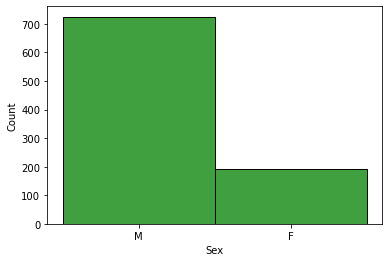

In [6]:
sns.histplot(df.Sex,color='g')

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

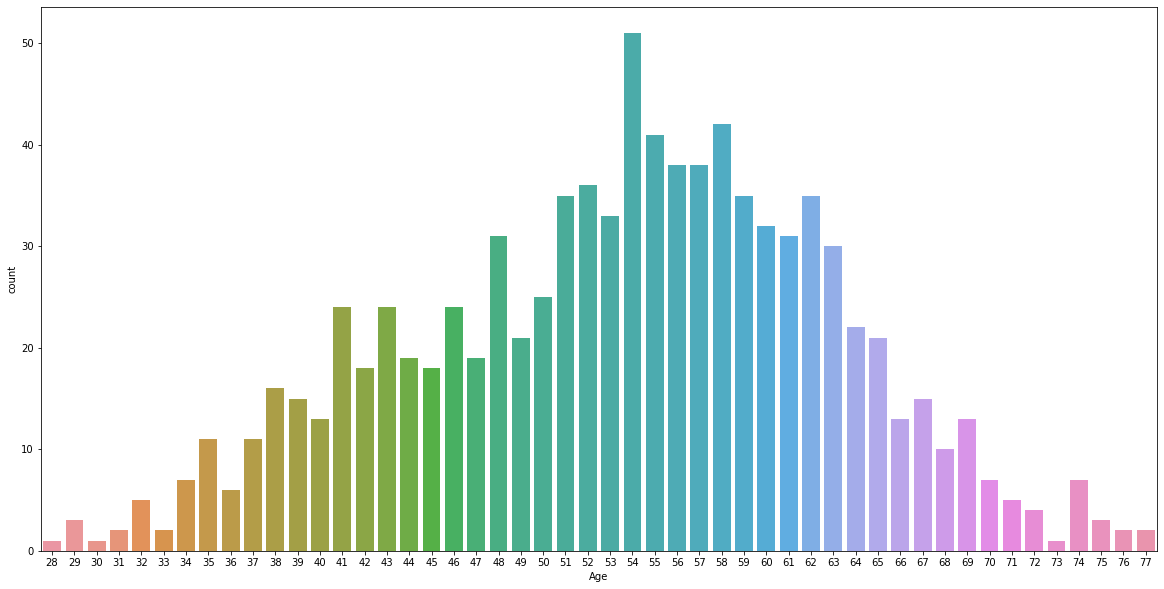

In [7]:
plt.figure(figsize = (20,10))
sns.countplot(df.Age)

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Count'>

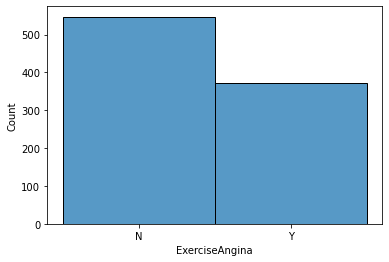

In [8]:
sns.histplot(df.ExerciseAngina)

In [9]:
def one_hot(x,letter):
    if x == letter:
        return 0
    else:
        return 1
df.Sex = df.Sex.apply(lambda x : one_hot(x,'M'))
df.ExerciseAngina = df.ExerciseAngina.apply(lambda x: one_hot(x,'N'))

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [11]:
one_hot = pd.get_dummies(df['ChestPainType'])
df.drop('ChestPainType',axis = 1,inplace = True)
df = df.join(one_hot)
#
one_hot = pd.get_dummies(df['RestingECG'])
df.drop('RestingECG',axis = 1,inplace = True)
df = df.join(one_hot)
#
one_hot = pd.get_dummies(df['ST_Slope'])
df.drop('ST_Slope',axis = 1,inplace = True)
df = df.join(one_hot)

In [12]:
df.drop(['ASY','Normal','Up'],axis = 1,inplace = True)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,TA,LVH,ST,Down,Flat
0,40,0,140,289,0,172,0,0.0,0,1,0,0,0,0,0,0
1,49,1,160,180,0,156,0,1.0,1,0,1,0,0,0,0,1
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,1,0,0
3,48,1,138,214,0,108,1,1.5,1,0,0,0,0,0,0,1
4,54,0,150,195,0,122,0,0.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1.2,1,0,0,1,0,0,0,1
914,68,0,144,193,1,141,0,3.4,1,0,0,0,0,0,0,1
915,57,0,130,131,0,115,1,1.2,1,0,0,0,0,0,0,1
916,57,1,130,236,0,174,0,0.0,1,1,0,0,1,0,0,1


In [13]:
Y = df.HeartDisease.values
df.drop(['HeartDisease'],axis = 1,inplace = True)

<AxesSubplot:>

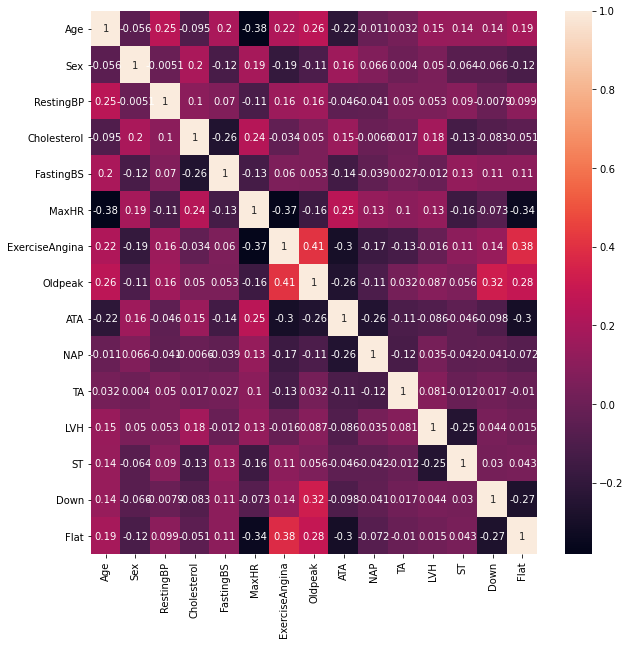

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)

In [15]:
X = df.values

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [19]:
len(X_train),len(X_test)

(688, 230)

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [21]:
predict = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [23]:
cm = confusion_matrix(y_test,predict)

<AxesSubplot:>

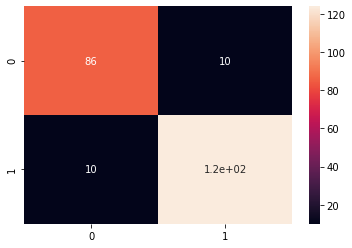

In [24]:
sns.heatmap(cm,annot = True)

In [25]:
Error_rate = 30/len(X_test)
Error_rate*100

13.043478260869565

In [26]:
accuracy_score(y_test,predict)*100

91.30434782608695